# Import Data
jika pakai google colab

In [1]:
# from google.colab import files
# uploaded = files.upload()

In [2]:
# import io
# import pandas as pd
# df = pd.read_csv(io.BytesIO(uploaded['human_resources.csv']))

In [3]:
import pandas as pd
df = pd.read_csv('Exercise Chapter 5 Topic 2_ Dataset About Human Resources.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [5]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


# Statistika Deskriptif

## Mean 

In [6]:
df_monthly_hours = df['average_montly_hours']
df_monthly_hours.mean()

201.0503366891126

## Median

In [7]:
df_monthly_hours = df['average_montly_hours']
df_monthly_hours.median()

200.0

## Mode

In [8]:
df_monthly_hours = df['average_montly_hours']
df_monthly_hours.mode()

0    135
1    156
Name: average_montly_hours, dtype: int64

In [9]:
df_monthly_hours.value_counts()

average_montly_hours
135    153
156    153
149    148
151    147
160    136
      ... 
297      7
288      6
299      6
96       6
303      6
Name: count, Length: 215, dtype: int64

## Range

In [10]:
df_monthly_hours = df['last_evaluation']
df_monthly_hours.max() - df_monthly_hours.min()

0.64

## Variance and Standard Deviation

In [11]:
df_monthly_hours = df['average_montly_hours']

In [12]:
# Variance
df_monthly_hours.var()

2494.313174809956

In [13]:
# Standard Deviation
df_monthly_hours.std()

49.94309937128408

#Interquartile

In [14]:
df_monthly_hours.quantile(0.75) - df_monthly_hours.quantile(0.25)

89.0

## Outliers

In [15]:
def get_outliers(df):

    # Menghitung 25th dan 75th percentile
    p75 = df.quantile(0.75)
    p25 = df.quantile(0.25)
    # Menghitung IQR dengan selisih 25th dan 75th percentile
    iqr = p75 - p25
    
    # "Minimum non-outlier value": 25th percentile - 1.5 * IQR (Interquartile range)
    min_val = p25 - 1.5*iqr
    # "Maximum non-outlier value": 75th percentile + 1.5 * IQR (Interquartile range)
    max_val = p75 + 1.5*iqr

    # Apapun dibawah minimum atau diatas maximum, disebut sebagai outlier
    outliers = df[(df < min_val) | (df > max_val)]
    return outliers

In [16]:
outlier = get_outliers(df_monthly_hours)
print(outlier)

Series([], Name: average_montly_hours, dtype: int64)


# Distribusi Data

In [17]:
import matplotlib
import matplotlib.pyplot as plt

(array([3244., 6443., 2557., 1473.,    0.,  718.,  188.,  162.,    0.,
         214.]),
 array([ 2. ,  2.8,  3.6,  4.4,  5.2,  6. ,  6.8,  7.6,  8.4,  9.2, 10. ]),
 <BarContainer object of 10 artists>)

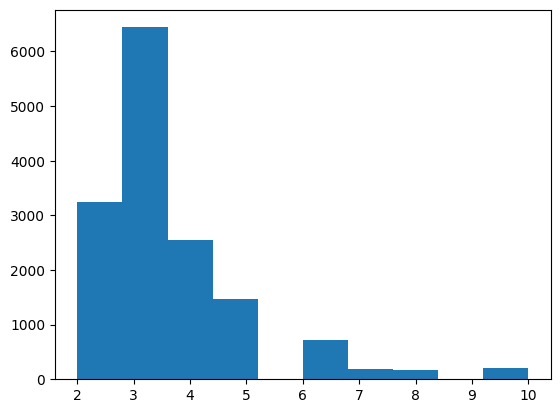

In [18]:
plt.hist(df['time_spend_company'])

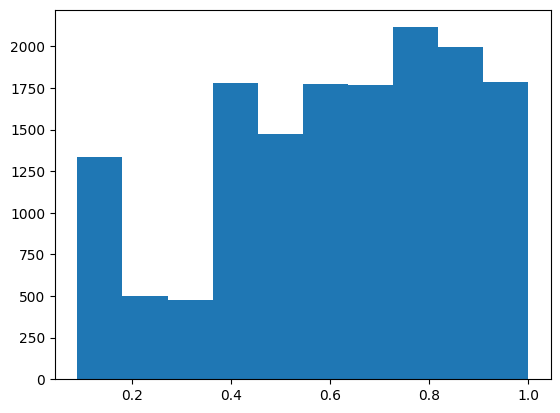

In [19]:
plt.hist(df['satisfaction_level'])
plt.show()

# Korelasi

In [20]:
import seaborn as sns

In [21]:
from sklearn import datasets
iris = datasets.load_iris()
iris = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [22]:
iris.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


## Heatmap

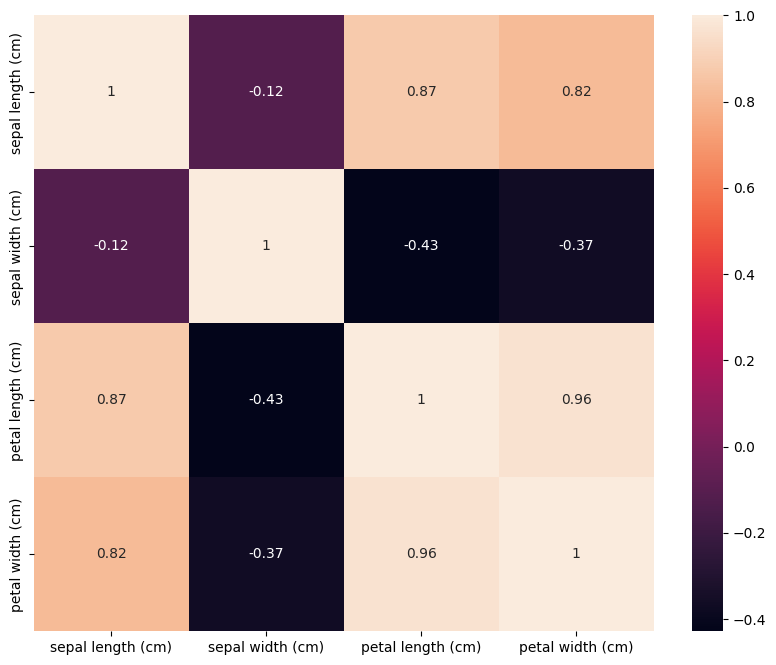

In [23]:
plt.figure(figsize=(10,8))
sns.heatmap(iris.corr(),annot=True)
plt.show()

## Regplot
membuat scatter plot bersamaan dengan garis regresi

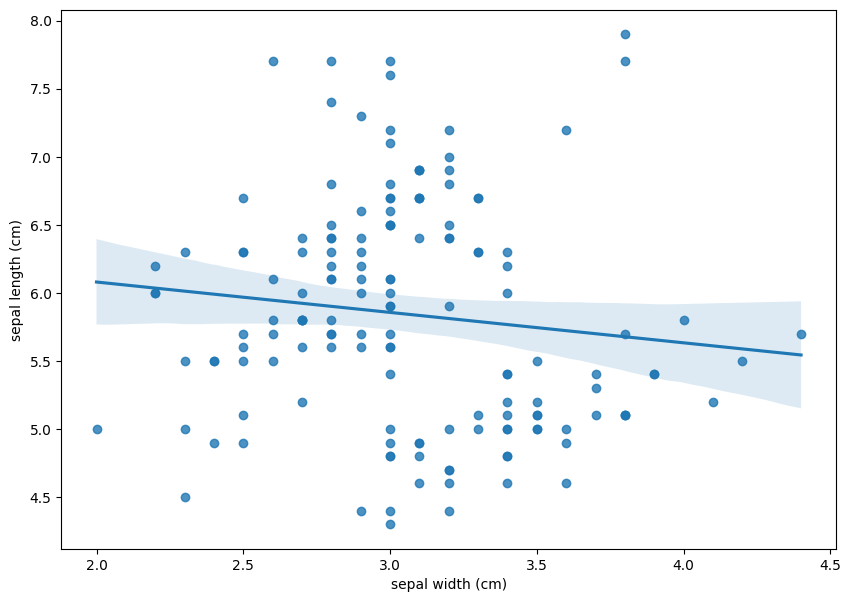

In [24]:
plt.figure(figsize = (10,7))
sns.regplot(x='sepal width (cm)',y='sepal length (cm)', data = iris)
plt.show()

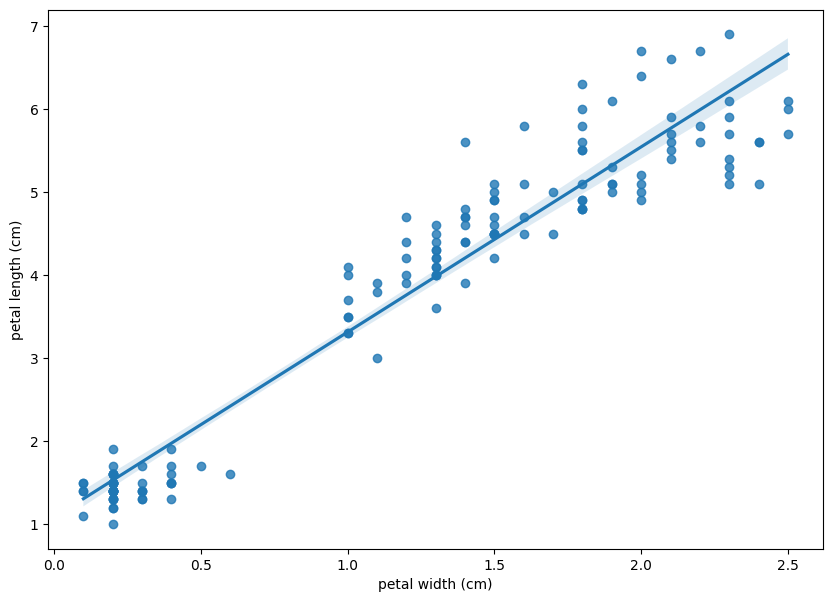

In [25]:
plt.figure(figsize = (10,7))
sns.regplot(x='petal width (cm)',y='petal length (cm)',data = iris)
plt.show()

## tambahan informasi
1. Titik-titik di atas garis regresi menjelaskan nilai aktual dari variabel dependen (y) melebihi nilai yang diprediksi oleh garis regresi.

2. Titik-titik di bawah garis regresi menjelaskan nilai aktual dari variabel dependen (y) lebih rendah dari nilai yang diprediksi oleh garis regresi.

3. Jarak vertikal antara titik-titik dan garis regresi menjelaskan tentang seberapa besar deviasi dari prediksi model. Semakin besar jaraknya, semakin besar deviasinya.

4. Ketebalan garis regresi menjelaskan indikasi seberapa baik model sesuai dengan data (ketidakpsatian). Garis regresi yang lebih tebal menjelaskan tingkat ketidakpastian yang lebih tinggi.

## Heatmap for HR Analytics

In [37]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)
plt.show()

ValueError: could not convert string to float: 'sales'

<Figure size 1000x800 with 0 Axes>

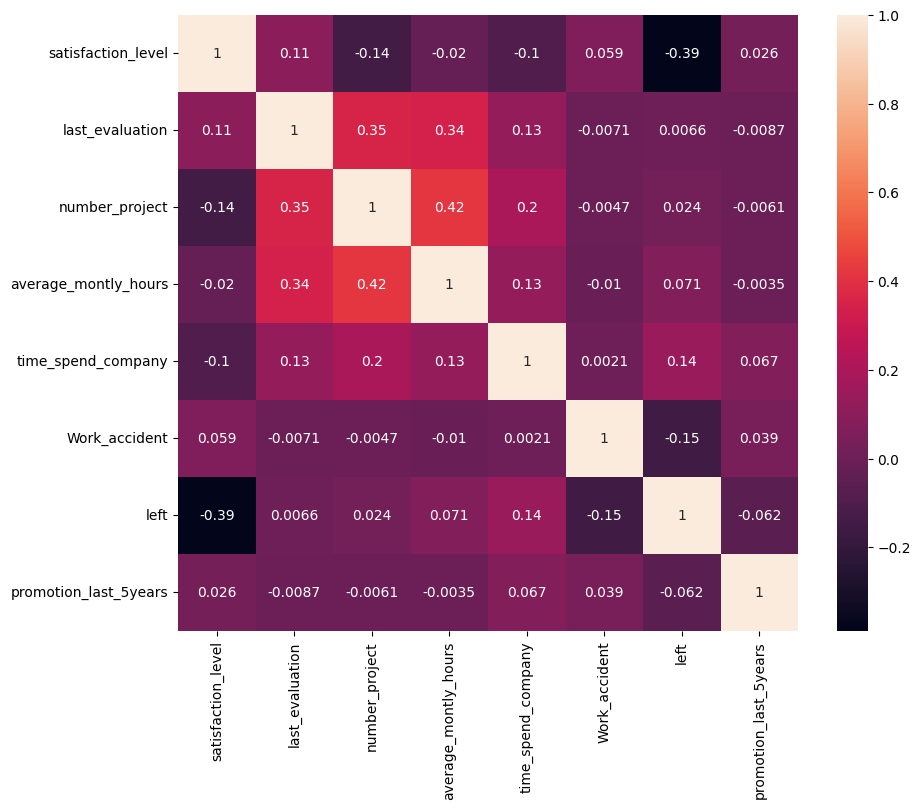

In [26]:
# cara 1: drop nilai non-numerik
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df[numeric_columns].corr()

# buat heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True)
plt.show()

cara 2: menggunakan one-hot-encoder / label encoder

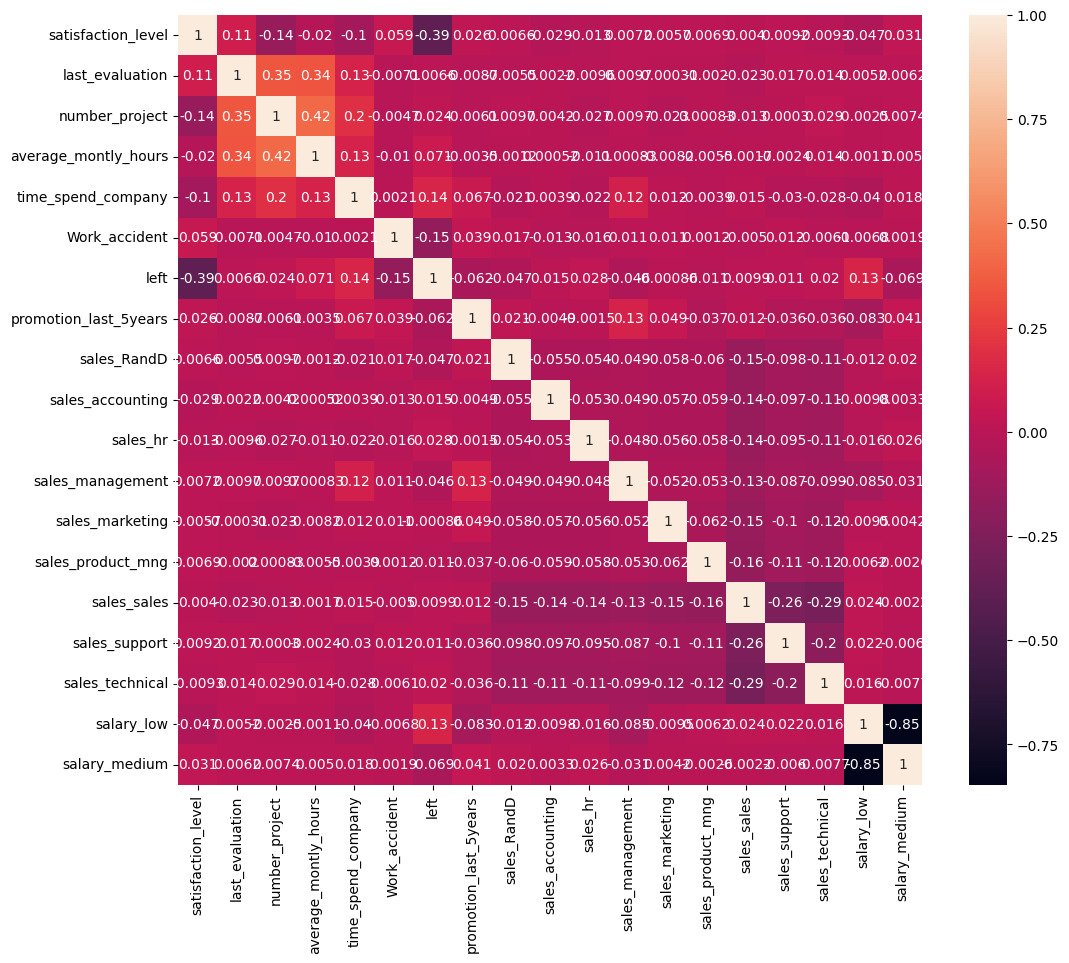

In [27]:
# One-hot-encoder untuk kolom 'sales' dan 'salary'
df_encoded = pd.get_dummies(df, columns=['sales', 'salary'], drop_first=True)

# Membuat heatmap korelasi
plt.figure(figsize=(12, 10))
sns.heatmap(df_encoded.corr(), annot=True)
plt.show()

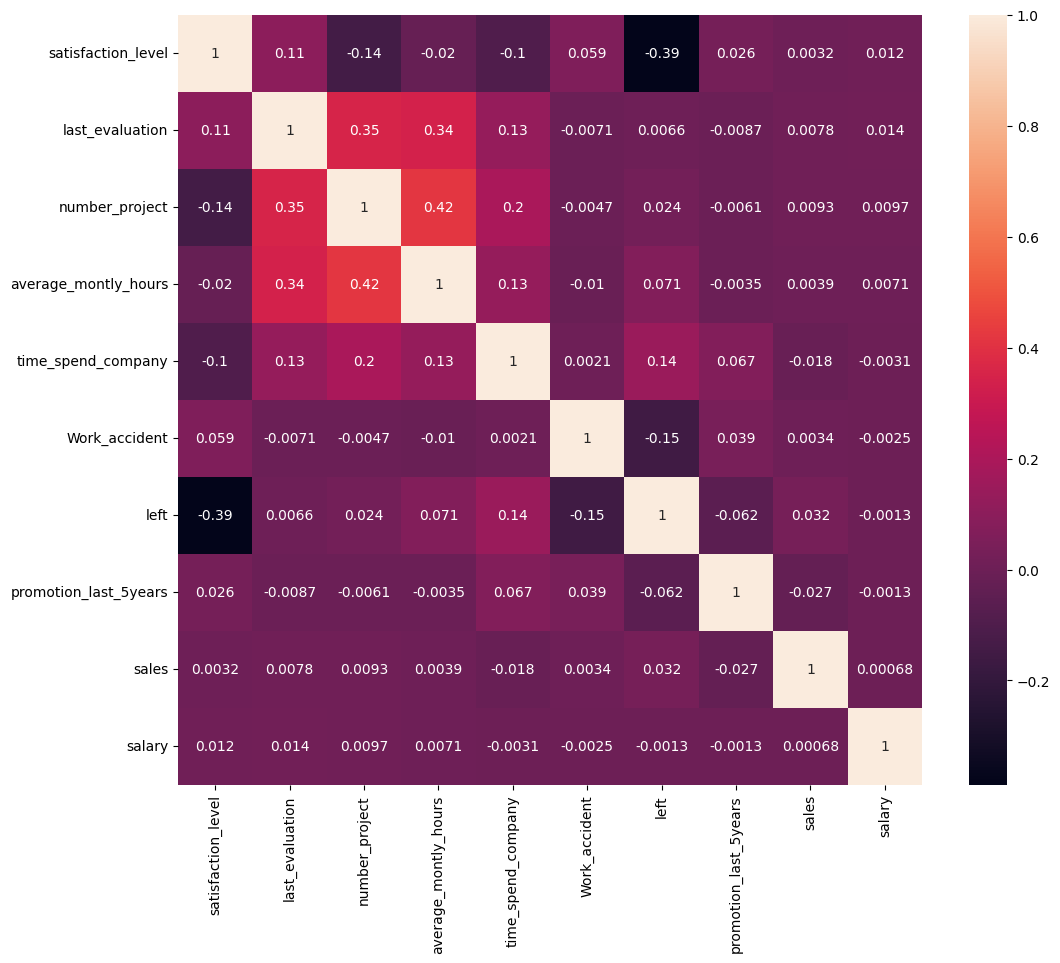

In [28]:
# Label Encoder untuk 'sales' dan 'salary'
from sklearn.preprocessing import LabelEncoder

# Mendefinisikan kolom-kolom yang perlu dienkoding
categorical_columns = ['sales', 'salary']

# Menggunakan LabelEncoder untuk kolom kategorikal
label_encoder = LabelEncoder()
df[categorical_columns] = df[categorical_columns].apply(label_encoder.fit_transform)

# Membuat heatmap korelasi
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True)
plt.show()

## kesimpulan

1. Label Encoding
Kapan digunakan: Label Encoding lebih sesuai untuk variabel kategori yang memiliki tingkatan ordinal, di mana urutan atau peringkat memiliki makna.

2. One-Hot Encoding:
Kapan digunakan: One-Hot Encoding lebih sesuai untuk variabel kategori yang bersifat nominal, di mana tidak ada urutan atau peringkat tertentu antar kategori.

3. Multicollinearity:
- Label Encoding: Bisa mengakibatkan masalah multicollinearity jika digunakan pada variabel kategori dengan lebih dari dua kategori, karena model mengartikan urutan numerik sebagai tingkatan.
- One-Hot Encoding: Menghindari masalah multicollinearity karena setiap kategori direpresentasikan sebagai variabel biner terpisah. cuma variable / fitur data menjadi lebih banyak. perlu penambahan algoritma untuk di reduksi (reduction dimentionality)

4. Implementasi di kerjaan terhadap model Machine Learning
- Label Encoding: Beberapa model, seperti random forest, bisa menangani Label Encoding dengan baik. Tapi, beberapa model yang menggunakan jarak (seperti regresi linear, K-Nearest Neighbors) dapat terpengaruh oleh urutan numerik.
- One-Hot Encoding: Lebih umum dipakai dan sesuai untuk sebagian besar model machine learning, terutama ketika tidak ada urutan khusus yang harus diwakili (ordinal).

Untuk menangani Reduction Dimentionality pakai metode Feature Selection:
1. Principal Compnent Analysis (PCA)
2. Linear Discriminant Analysis (LDA)
3. Recursive Feature Elimination (RFE)

list metode tersebut untuk mendapatkan Feature Importance